# Spike Notebook

a simplified environment for processing Bruker NMR datasets with `SPIKE`.

# 2D NMR Processing and Display

***Usage***

- Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).
- Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.
- The SPIKE code used for processing is visible in the cells, and can be used as a minimal tutorial.
- You can hide it when done to present a clean NoteBook.


***Remark*** *to use this program, you should have installed the following packages:*

- *a complete scientific python environment ( tested with python 3.7 - [anaconda](https://www.anaconda.com/))*
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.32 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.6* )
- [`ipympl`](https://github.com/matplotlib/jupyter-matplotlib)  ( *adds interactivity in the notebook* )

## Initialization
the following cell should be run only once, at the beginning of the processing

## STARTING Environment...


          SPIKE
    Version     : 0.99.32
    Date        : 08-02-2023
    Revision Id : 586

loading plugins... ( use spike.plugins.report() for a short description of each plugins )
*** zoom3D not loaded ***
generic plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 
user plugins loaded:
msapmin, 
NMR plugins loaded:
Bruker_NMR_FT,  Bucketing,  Integrate,  PALMA,  apmin, 
MS plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 

Interactive module version, 1.3.0

Interactive module version, 1.3.0


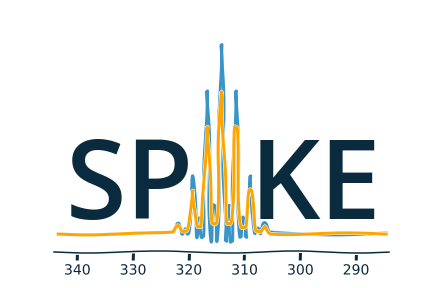

Run date: 2023-03-09T16:22:51.294854


## ...program is Ready

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
from IPython.display import display, HTML, Markdown, Image
display(Markdown('## STARTING Environment...'))
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget
import os.path as op
import spike
from spike.File.BrukerNMR import Import_2D
from spike.Interactive import INTER as I
from spike.Interactive import INTER_2D as I2D
from spike.Interactive.ipyfilechooser import FileChooser
print("\nInteractive module version,",I.__version__)
I.initialize()
from datetime import datetime
print('Run date:', datetime.now().isoformat() )
display(Markdown('## ...program is Ready'))
from importlib import reload  # the two following lines are debugging help

# configurable items - you may change them to fit you preferences
verbose = 1                              # chose from 0 (terse) to 3 more verbose
mpl.rcParams['figure.figsize'] = (8,4)   # (X,Y) default figure size
I.Activate_Wheel = True                  # True/False    scale with wheel control in the graphic cells 
I.reverse_scroll = False                 # inverse the direction of the mouse wheel, whether it is `True` (TrackPad) or `False` (Mouse)

---

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- After the selection, the selected filename is found in `FC.selected`

In [2]:
FC = FileChooser(path='/DATA/',filename='ser')
display(FC)

FileChooser(path='/DATA', filename='ser', show_hidden='False')

### Import dataset

This is simply done with the `Import_2D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable called d2. 

Reading file  /DATA/ARTEref/20/ser
2D data-set
Axis F1 :NMR axis at 700.163291 MHz, 200 complex pairs,  from -1.310430 ppm (-917.514982 Hz) to 10.711770 ppm  (7499.988138 Hz)
Axis F2: NMR axis at 700.163291 MHz, 2048 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is hypercomplex (order 2)
<dipsi2phpr>


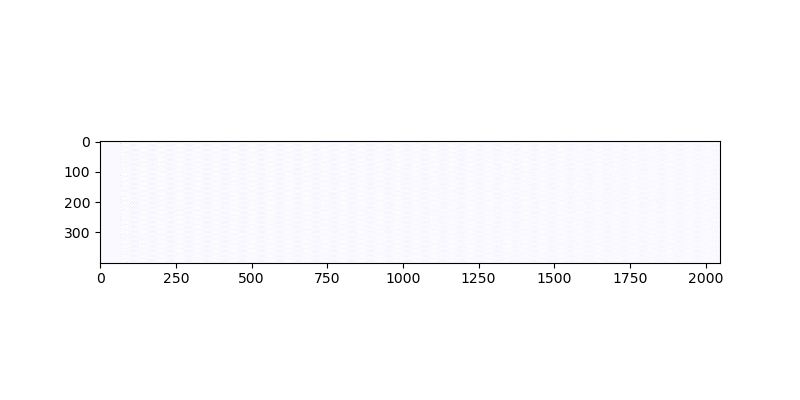

In [5]:
print('Reading file ',FC.selected)
d2 = Import_2D(FC.selected)
d2.filename = FC.selected
d2.pulprog = d2.params['acqu']['$PULPROG']
print(d2)                                      # print() of the dataset shows a summary of the parameters
print(d2.pulprog)
display(HTML('<b>title: </b>'+ d2.params['acqu']['title']))    # d1.params is a dictionary which contains the whole 'acqu' and 'proc' Bruker parameters
#d2.set_unit('sec').display(title="%s %s"%(FC.nmrname,d2.pulprog), scale='auto')
plt.figure()
plt.imshow(d2.get_buffer().real, cmap="seismic");

*Check Proc1DNMR NoteBook for documentation on spectral display*

## Basic Processing
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform - modulus mode!

Show2D(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Positive', layout=Layout(widt…

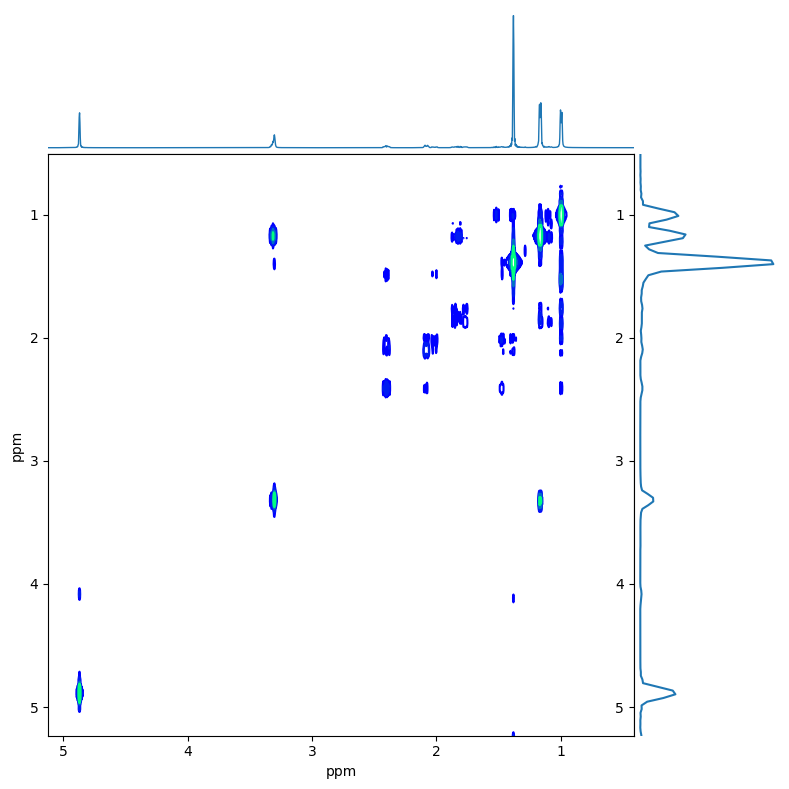

In [6]:
D2 = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2.apod_sin(maxi=0.5,axis='F2').zf(1,2).bk_ftF2()  # chaining  apodisation - zerofill - FT
D2.apod_sin(maxi=0.5,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2.modulus().set_unit('ppm').rem_ridge()
#D2.display(scale="auto", autoscalethresh=100.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display
I2D.Show2D(D2)

### Advanced Phase sensitive processing



Show2D(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Positive', layout=Layout(widt…

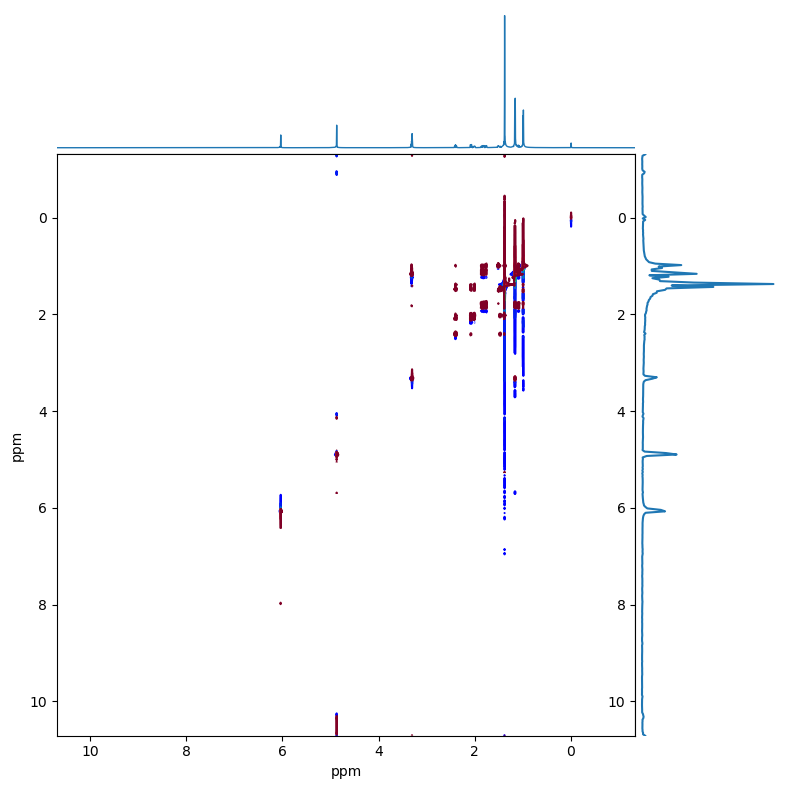

In [7]:
D2ph = d2.copy() # copy the imported data-set to another object for processing
# bk_ftF2 and bk_ftF1 (define in the Bruker plugin) find which FT to apply depending on FnMODE
D2ph.apod_sin(maxi=0,axis='F2').zf(1,2).bk_ftF2().bk_pk()  # chaining  apodisation - zerofill - FT - phase
D2ph.apod_sin(maxi=0,axis='F1').zf(2,1).bk_ftF1()  # chaining  apodisation - zerofill - FT
D2ph.set_unit('ppm').rem_ridge()
#D2.display(scale="auto",  autoscalethresh=6.0, title="%s %s"%(FC.nmrname,d2.pulprog))  # chain  set to ppm unit - and display
S = I2D.Show2D(D2ph)           # note that you can create the view and store it in a var without displaying it
S.negview.value = True         # and set some parameters (here negative view) before display
S

### Rephasing

Use the sliders to adjust the phase parameters,   the pivot can be set with a right click on the spectrum
Top and Side spectra are taken at the pivot level.



WARNING this tool is not fully tested yet


Phaser2D(children=(VBox(children=(GridBox(children=(HTML(value='<b>F1</b>'), HTML(value='<b>F2</b>'), FloatSli…

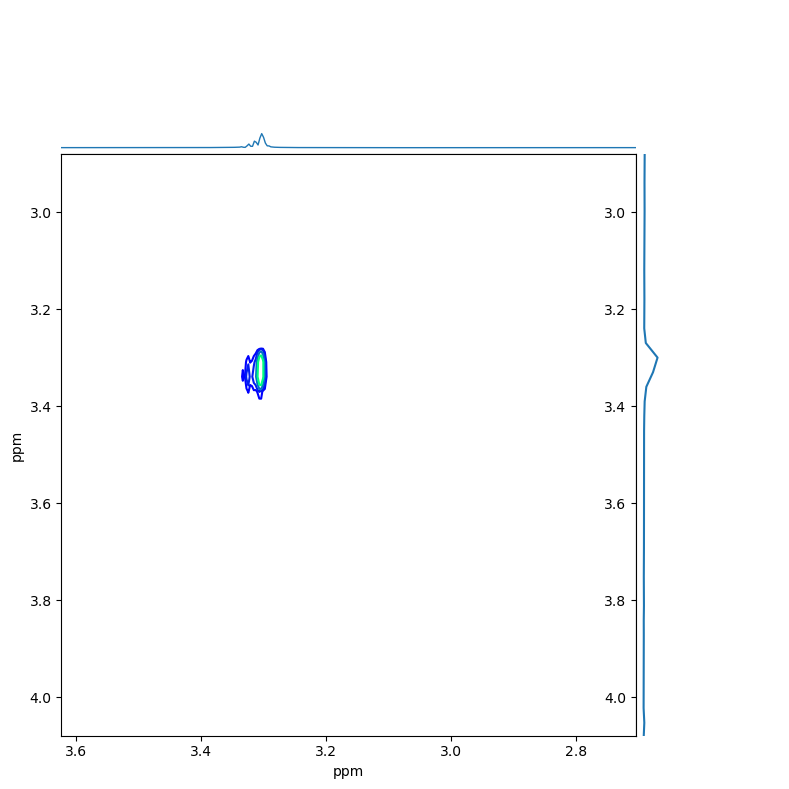

Applied: phase(-174.6,155.0,axis='F1').phase(18.0,0.0,axis='F2')


In [13]:
reload(I2D)
P = I2D.Phaser2D(D2ph)
P

# Some clean-up, and Display



In [23]:
D2ph.real(axis=1).real(axis=2).rem_ridge()   # rem_ridge() is a minimum baseline correction

2D data-set
Axis F1 :NMR axis at 700.163291 MHz, 400 real points, from -1.310430 ppm (-917.514982 Hz) to 10.711770 ppm  (7499.988138 Hz)
Axis F2: NMR axis at 700.163291 MHz, 4096 real points, from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

Show2D(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='Positive', layout=Layout(widt…

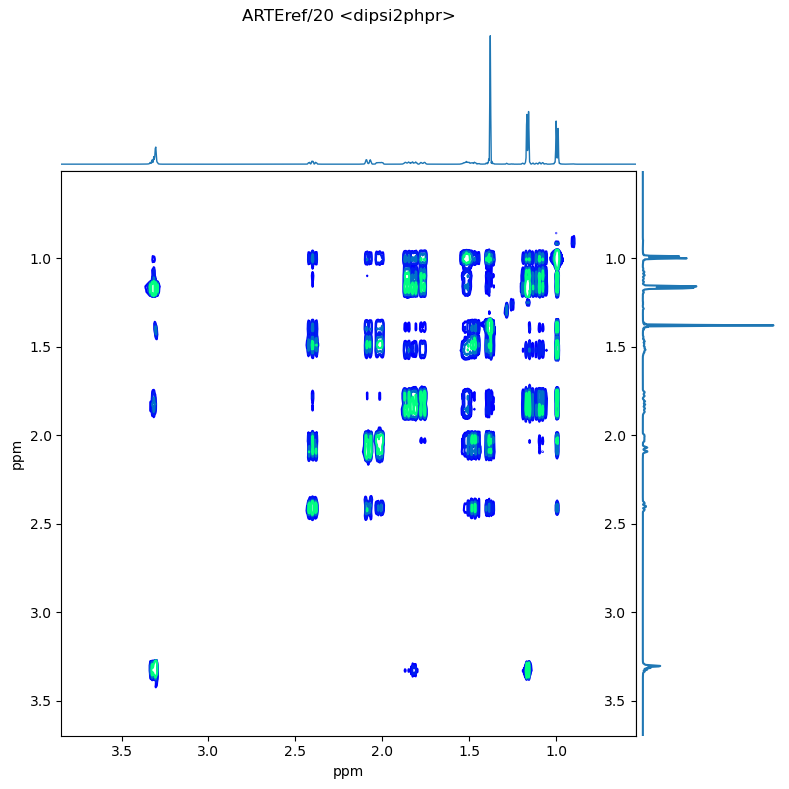

In [25]:
S2 = I2D.Show2D(D2ph,  title="%s %s"%(FC.nmrname,d2.pulprog))
S2.proj1 = S2.proj2
S2

# look at columns and rows

In [ ]:
F1slice = 3.3    # select a F1 (vertical) slice in current unit (here ppm) 
F2slice = 2.05   # select a F2 (horizontal) slice in current unit (here ppm) 

D2ph.col( D2ph.axis2.ctoi(F1slice)).display(title='F1 slice at F2=%.3f ppm'%(F1slice,))
D2ph.row( D2ph.axis1.ctoi(F2slice)).display(title='F2 slice at F1=%.3f ppm'%(F2slice,))

## Save on disk

In [26]:
D2.save('example1.gs2')

writing 2D


2D data-set
Axis F1 :NMR axis at 700.163291 MHz, 400 real points, from -1.310430 ppm (-917.514982 Hz) to 10.711770 ppm  (7499.988138 Hz)
Axis F2: NMR axis at 700.163291 MHz, 4096 real points, from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

# The following entries or not finished yet

### todo:
- Show2Dplus() !
- colormap
- peakckpicker
- bcket

## Peak-Picker
- moving the threshold determines the minimum peak intensity
- peaks are searched only in the selected zoom window

## Export a bucket list

In [ ]:
# adapt the parameters below
Zoom = ((0.5,8),(0.5,8))                    # zone to bucket       - in ppm
BucketSize = (0.1,0.1)                 # width of the buckets - in ppm
Output = 'screen'                   # 'screen'  or  'file'  determines output
BucketFileName = 'bucket.csv'     #  the filename if Output (above) is 'file'  - don't forget the .csv extension.

In [ ]:
# the following cell executes the bucketing
if Output == 'file':
    with open(BucketFileName,'w') as F:
        D2.bucket2d(zoom=Zoom, bsize=BucketSize, file=F)
    print('buckets written to %s\n'%op.realpath(BucketFileName))
else:
    D2.bucket2d(zoom=Zoom, bsize=BucketSize)

*Tools in this page is under intensive development - don't expect things to remain as they are.*